In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
def initalize_centroids(x,k):
  indices=np.random.choice(len(x),k,replace=False)
  return x[indices]

In [13]:
def assign_to_clusters(x,centroids):
  distances=np.linalg.norm(x[:,np.newaxis]-centroids,axis=2)  #norms->automatically calclate the eucleadian distance
  return np.argmin(distances,axis=1)

In [14]:
def update_centroids(x,labels,k):
  centroids=np.array([x[labels==i].mean(axis=0) for i in range(k)])
  return centroids

In [15]:
def k_means(x,k,max_iters=100):
  centroids=initalize_centroids(x,k)

  for _ in range(max_iters):
    labels=assign_to_clusters(x,centroids)
    new_centroids=update_centroids(x,labels,k)

    if np.all(centroids==new_centroids):
      break

    centroids=new_centroids
  return labels,centroids

In [16]:
np.random.seed(42)
x=np.concatenate([np.random.normal(loc=i,scale=1,size=(50,2)) for i in range(5)])

In [18]:
#x

In [20]:
k=5
labels,centroids=k_means(x,k)

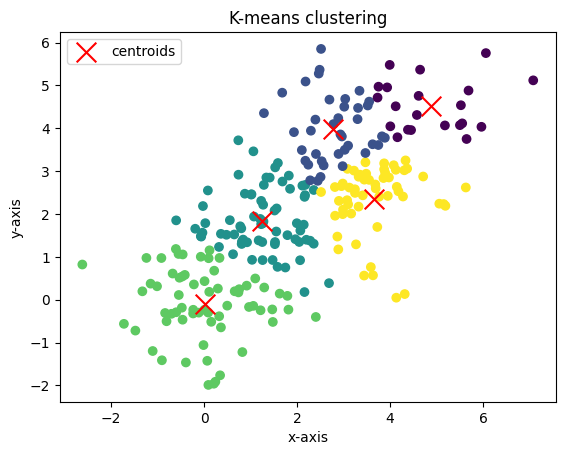

In [23]:
plt.scatter(x[:,0],x[:,1],c=labels,cmap='viridis')
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=200,c='red',label='centroids')
plt.title('K-means clustering')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.show()